# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [70]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2: Read in your data set 

In [5]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [6]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 398 complete observations. 2 observations are missing gre & gpa while 1 is missing prestige

#### Question 2. Create a summary table

In [7]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: the values GRE can take are larger. looking at the ratio of the max values for each variable to the standard deviation, both std values are in range (9%, 15%) of the max value (see below).

In [13]:
df_raw.gre.std()/df_raw.gre.max() # ratio of gre.std() to gre.max()

0.14453564136441185

In [15]:
df_raw.gpa.std()/df_raw.gpa.max() # ratio of gpa.std() to gpa.max()

0.095157595014153454

#### Question 4. Drop data points with missing data


In [17]:
df_clean = df_raw.dropna(axis=0, how='any')

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [22]:
df_clean.count() # values dropped -- now all variables feature same number of observations

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 6. Create box plots for GRE and GPA

{'boxes': [<matplotlib.lines.Line2D at 0x1193f5150>],
 'caps': [<matplotlib.lines.Line2D at 0x1193f5f90>,
 'fliers': [<matplotlib.lines.Line2D at 0x1194e7910>],
 'means': [<matplotlib.lines.Line2D at 0x1194e72d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1194dcc50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1193f5290>,
  <matplotlib.lines.Line2D at 0x1193f5950>]}

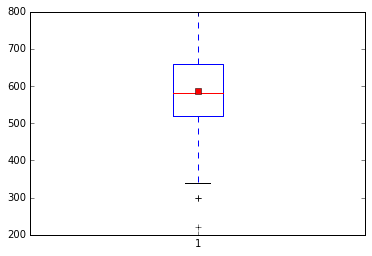

In [43]:
#boxplot gre
plt.boxplot(df_clean['gre'], showmeans=True)

In [65]:
df_clean['gre'].sort_values().head(10) # visualizing outliers depicted in above boxplot

304    220.0
179    300.0
71     300.0
315    300.0
216    340.0
316    340.0
100    340.0
119    340.0
17     360.0
281    360.0
Name: gre, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x119594090>],
 'caps': [<matplotlib.lines.Line2D at 0x119594ed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x119643850>],
 'means': [<matplotlib.lines.Line2D at 0x119643210>],
 'medians': [<matplotlib.lines.Line2D at 0x119638b90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1195941d0>,
  <matplotlib.lines.Line2D at 0x119594890>]}

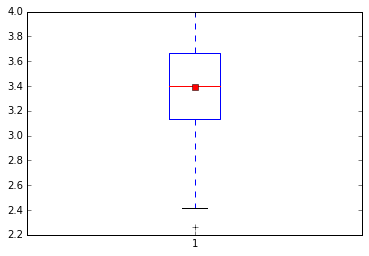

In [44]:
#boxplot gpa
plt.boxplot(df_clean['gpa'], showmeans=True)

#### Question 7. What do these plots show?

Answer: these values show the distribution of the data. the boxes represent the quartiles, the whiskers represent the range, line represents median and dot shows mean.

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a0dc410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a3dae50>]], dtype=object)

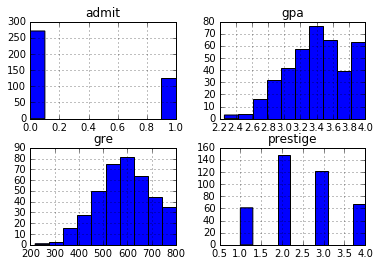

In [68]:
# plot the distribution of each variable 
df_clean.hist()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: 

#### Question 11. Which of our variables are potentially colinear? 

In [69]:
# create a correlation matrix for the data
df_clean.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


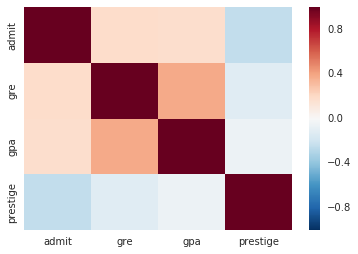

In [74]:
corr = df_clean.corr()
sns.heatmap(corr) #heatmap using seaborn

#### Question 12. What did you find?

Answer: gpa and gre are strongly correlated. These two variables appear to be collinear.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: We will test the association between grad school admissions rates and prestige of undergraduate schools. To do this, we will run a regression test using admissions rates as the outcome variable and prestige as the independent/predictor variable. Our regression result will allow us to determine the relationship between the predictor and the outcome (direct or inverse) as well as discern if there is a significant relationship at all.

#### Question 14. What is your hypothesis? 

Answer: Prestige alone will not be a sufficient predictor of admissions outcomes. There will be an inverse relationship between admission rate prestige.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data